In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# cf.go_offline()
%matplotlib inline

deliveries = pd.read_csv("IPL Cricsheet CS new/all_matches.csv")
deliveries

C:\Users\Asus\anaconda3\envs\DataAnalysisEnv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199917,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,19.2,Royal Challengers Bangalore,Punjab Kings,KA Jamieson,HV Patel,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199918,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,19.3,Royal Challengers Bangalore,Punjab Kings,HV Patel,KA Jamieson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199919,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,19.4,Royal Challengers Bangalore,Punjab Kings,HV Patel,KA Jamieson,...,0,NaN,NaN,NaN,NaN,NaN,caught,HV Patel,NaN,NaN
199920,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,19.5,Royal Challengers Bangalore,Punjab Kings,KA Jamieson,Mohammed Siraj,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
deliveries.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'over number', 'ball number'],
      dtype='object')

In [8]:
pd.options.display.max_columns
pd.set_option("display.max_columns", 50)

In [17]:
deliveries.wicket_type.unique()
bowlers_wickets = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

In [20]:
deliveries['over number'] = deliveries['ball'].apply(lambda x: int(np.ceil(x)))
deliveries['ball number'] = deliveries['ball'].apply(lambda x: int(np.round((x%1)*10)))
deliveries['wides'] = deliveries['wides'].apply(lambda x: int(x) if(x>0) else 0)
deliveries['noballs'] = deliveries['noballs'].apply(lambda x: int(x) if(x>0) else 0)
deliveries['legbyes'] = deliveries['legbyes'].apply(lambda x: int(x) if(x>0) else 0)
deliveries['byes'] = deliveries['byes'].apply(lambda x: int(x) if(x>0) else 0)
deliveries['penalty'] = deliveries['penalty'].apply(lambda x: int(x) if(x>0) else 0)
deliveries['is_dot_batsman'] = deliveries['runs_off_bat'].apply(lambda x: 1 if (x==0) else 0)
deliveries['bowler_runs'] = deliveries['runs_off_bat'] + deliveries['wides'] + deliveries['noballs']
deliveries['is_dot_bowler'] = deliveries['bowler_runs'].apply(lambda x: 1 if(x==0) else 0)
deliveries['is_wicket'] = deliveries['player_dismissed'].apply(lambda x: 1 if(type(x) == str) else 0)
deliveries['is_four'] = deliveries['runs_off_bat'].apply(lambda x: 1 if(x==4) else 0)
deliveries['is_six'] = deliveries['runs_off_bat'].apply(lambda x: 1 if(x==6) else 0)
deliveries['is_boundary'] = deliveries['runs_off_bat'].apply(lambda x: 1 if(x==4 or x==6) else 0)
deliveries['is_bowlers_wicket'] = deliveries['wicket_type'].apply(lambda x: 1 if(x in bowlers_wickets) else 0)
deliveries


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,over number,ball number,is_dot_batsman,bowler_runs,is_dot_bowler,is_wicket,is_four,is_six,is_boundary,is_bowlers_wicket
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,0,0,0,1,0,NaN,NaN,NaN,NaN,1,1,1,0,1,0,0,0,0,0
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1,2,1,0,1,0,0,0,0,0
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN,1,3,1,1,0,0,0,0,0,0
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1,4,1,0,1,0,0,0,0,0
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1,5,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199917,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,19.2,Royal Challengers Bangalore,Punjab Kings,KA Jamieson,HV Patel,RP Meredith,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,20,2,0,1,0,0,0,0,0,0
199918,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,19.3,Royal Challengers Bangalore,Punjab Kings,HV Patel,KA Jamieson,Mohammed Shami,4,0,0,0,0,0,0,NaN,NaN,NaN,NaN,20,3,0,4,0,0,1,0,1,0
199919,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,19.4,Royal Challengers Bangalore,Punjab Kings,HV Patel,KA Jamieson,Mohammed Shami,0,0,0,0,0,0,0,caught,HV Patel,NaN,NaN,20,4,1,0,1,1,0,0,0,1
199920,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,19.5,Royal Challengers Bangalore,Punjab Kings,KA Jamieson,Mohammed Siraj,Mohammed Shami,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,20,5,0,1,0,0,0,0,0,0


In [21]:
abd = deliveries[deliveries['striker'] == 'AB de Villiers']
abd_post2019 = abd[abd['start_date'] > '2019-12-31']
abd_post2019

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,over number,ball number,is_dot_batsman,bowler_runs,is_dot_bowler,is_wicket,is_four,is_six,is_boundary,is_bowlers_wicket
179629,1216534,2020/21,2020-09-21,Dubai International Cricket Stadium,1,11.2,Royal Challengers Bangalore,Sunrisers Hyderabad,AB de Villiers,V Kohli,Abhishek Sharma,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,2,1,0,1,0,0,0,0,0
179630,1216534,2020/21,2020-09-21,Dubai International Cricket Stadium,1,11.3,Royal Challengers Bangalore,Sunrisers Hyderabad,AB de Villiers,V Kohli,Abhishek Sharma,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,3,0,1,0,0,0,0,0,0
179633,1216534,2020/21,2020-09-21,Dubai International Cricket Stadium,1,11.6,Royal Challengers Bangalore,Sunrisers Hyderabad,AB de Villiers,V Kohli,Abhishek Sharma,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,6,0,1,0,0,0,0,0,0
179634,1216534,2020/21,2020-09-21,Dubai International Cricket Stadium,1,12.1,Royal Challengers Bangalore,Sunrisers Hyderabad,AB de Villiers,V Kohli,Rashid Khan,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,13,1,0,1,0,0,0,0,0,0
179636,1216534,2020/21,2020-09-21,Dubai International Cricket Stadium,1,12.3,Royal Challengers Bangalore,Sunrisers Hyderabad,AB de Villiers,V Kohli,Rashid Khan,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,13,3,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199867,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,11.2,Royal Challengers Bangalore,Punjab Kings,AB de Villiers,RM Patidar,Ravi Bishnoi,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,2,0,1,0,0,0,0,0,0
199869,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,11.4,Royal Challengers Bangalore,Punjab Kings,AB de Villiers,RM Patidar,Ravi Bishnoi,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,4,1,0,1,0,0,0,0,0
199870,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,11.5,Royal Challengers Bangalore,Punjab Kings,AB de Villiers,RM Patidar,Ravi Bishnoi,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,5,0,1,0,0,0,0,0,0
199872,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,11.7,Royal Challengers Bangalore,Punjab Kings,AB de Villiers,RM Patidar,Ravi Bishnoi,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,7,0,1,0,0,0,0,0,0


In [22]:
def average(runs, wickets):
    return runs/wickets
    
def sr(balls, runs):
    return runs/balls*100
    
def rpi(innings, runs):
    return runs/innings
    
def dot_p(balls, dots):
    return dots/balls*100
    
def bpb(balls, boundaries):
    return balls/boundaries

def bpd(balls, wickets):
    return balls/wickets

In [56]:
def batsman_stats(df):
    
    innings = pd.DataFrame(df.groupby('innings')['match_id'].nunique())
    balls = pd.DataFrame(df.groupby('innings')['ball'].count())
    wides = pd.DataFrame(df.groupby('innings')['wides'].sum())
    balls = balls.merge(wides, on='innings') 
    balls['ball'] = balls['ball'] - balls['wides']
    balls.drop(['wides'], axis = 1, inplace=True)
    balls.columns = ['Balls Faced']
    
    runs =  pd.DataFrame(df.groupby('innings')['runs_off_bat'].sum())
    dismissals = pd.DataFrame(df[df['player_dismissed'] == 'AB de Villiers'].groupby('innings')['is_wicket'].sum())
    dots = pd.DataFrame(df.groupby('innings')['is_dot_batsman'].sum())
    dots = dots.merge(wides, on='innings') 
    dots['is_dot_batsman'] = dots['is_dot_batsman'] - dots['wides']
    dots.drop(['wides'], axis = 1, inplace=True)
    fours = pd.DataFrame(df.groupby('innings')['is_four'].sum())
    sixes = pd.DataFrame(df.groupby('innings')['is_six'].sum())
    boundaries = pd.DataFrame(df.groupby('innings')['is_boundary'].sum())

    abd_innings_wise = innings.merge(balls, on='innings').merge(runs, on='innings').merge(dismissals, on='innings').merge(dots, on='innings').merge(fours, on='innings').merge(sixes, on='innings').merge(boundaries, on='innings')
    abd_innings_wise.columns = ['Innings', 'Balls Faced', 'Runs', 'Dismissals', 'Dots', 'Fours', 'Sixes', 'Boundaries']
    
    abd_innings_wise['Average'] = abd_innings_wise.apply(lambda x: (average(x['Runs'], x['Dismissals'])), axis=1)
    abd_innings_wise['Strike Rate'] = abd_innings_wise.apply(lambda x: (sr(x['Balls Faced'], x['Runs'])), axis=1)
    abd_innings_wise['Runs Per Innings'] = abd_innings_wise.apply(lambda x: (rpi(x['Innings'], x['Runs'])), axis=1)
    abd_innings_wise['Dot%'] = abd_innings_wise.apply(lambda x: (dot_p(x['Balls Faced'], x['Dots'])), axis=1)
    abd_innings_wise['Balls Per Boundary'] = abd_innings_wise.apply(lambda x: (bpb(x['Balls Faced'], x['Boundaries'])), axis=1)
    abd_innings_wise['Ball Per Dismissal'] = abd_innings_wise.apply(lambda x: (bpd(x['Balls Faced'], x['Dismissals'])), axis=1)

    abd_innings_wise = abd_innings_wise.round(decimals=2)
    return abd_innings_wise

In [58]:
all_matches_data = pd.read_csv('IPL data/all_season_summary.csv')
all_matches_data

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2020,1216492,Mumbai Indians v Chennai Super Kings,MI v CSK,"1st Match (N), Indian Premier League at Abu Dh...",MI,CSK,CSK,BOWL FIRST,162/9,166/5,162/9,166/5,CSK,Super Kings won by 5 wickets,2020-09-19T14:00Z,2020-09-21T23:59Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Rohit Sharma,MS Dhoni,Ambati Rayudu,"Chennai Super Kings 2, Mumbai Indians 0",False,20.0,162.0,9.0,19.0,19.2,166.0,5.0,21.0,"Ambati Rayudu, Faf du Plessis help CSK break M...","Saurabh Tiwary,Quinton de Kock","James Pattinson,Trent Boult","Rohit Sharma (BT),Quinton de Kock (WK),Suryaku...","Murali Vijay (BT),Shane Watson (AR),Faf du Ple...","Ambati Rayudu,Faf du Plessis","Lungi Ngidi,Deepak Chahar",19 September 2020 - night match (20-over match),Chris Gaffaney,Virender Sharma,Sundaram Ravi,Manu Nayyar,Ulhas Gandhe
1,2020,1216493,Delhi Capitals v Kings XI Punjab,DC v KXIP,"2nd Match (N), Indian Premier League at Dubai ...",DC,KXIP,KXIP,BOWL FIRST,157/8,157/8,157/8,157/8,DC,Match tied (Delhi Capitals won the one-over el...,2020-09-20T14:00Z,2020-09-22T23:59Z,392627,Dubai International Cricket Stadium,Shreyas Iyer,KL Rahul,Marcus Stoinis,"Delhi Capitals 2, Kings XI Punjab 0",True,20.0,157.0,8.0,19.0,20.0,157.0,8.0,18.0,Delhi Capitals claim Super-Over win after Marc...,"Marcus Stoinis,Shreyas Iyer","Ravichandran Ashwin,Kagiso Rabada","Prithvi Shaw (BT),Shikhar Dhawan (BT),Shimron ...","KL Rahul (WK),Mayank Agarwal (BT),Karun Nair (...","Mayank Agarwal,KL Rahul","Mohammed Shami,Sheldon Cottrell",20 September 2020 - night match (20-over match),Anil Chaudhary,Nitin Menon,Paul Reiffel,Javagal Srinath,Yeshwant Barde
2,2020,1216534,Sunrisers Hyderabad v Royal Challengers Bangalore,SRH v RCB,"3rd Match (N), Indian Premier League at Dubai ...",SRH,RCB,SRH,BOWL FIRST,163/5,153,153,163/5,RCB,RCB won by 10 runs,2020-09-21T14:00Z,2020-09-23T23:59Z,392627,Dubai International Cricket Stadium,David Warner,Virat Kohli,Yuzvendra Chahal,"Royal Challengers Bangalore 2, Sunrisers Hyder...",False,19.4,153.0,10.0,17.0,20.0,163.0,5.0,17.0,"Yuzvendra Chahal three-for, Sunrisers Hyderaba...","Jonny Bairstow,Manish Pandey","Abhishek Sharma,Vijay Shankar","David Warner (BT),Jonny Bairstow (WK),Manish P...","Devdutt Padikkal (BT),Aaron Finch (BT),Virat K...","Devdutt Padikkal,AB de Villiers","Yuzvendra Chahal,Shivam Dube",21 September 2020 - night match (20-over match),Anil Dandekar,Nitin Menon,Anil Chaudhary,Prakash Bhatt,Yeshwant Barde
3,2020,1216496,Rajasthan Royals v Chennai Super Kings,RR v CSK,"4th Match (N), Indian Premier League at Sharja...",RR,CSK,CSK,BOWL FIRST,216/7,200/6,216/7,200/6,RR,Royals won by 16 runs,2020-09-22T14:00Z,2020-09-24T23:59Z,59392,Sharjah Cricket Stadium,Steven Smith,MS Dhoni,Sanju Samson,"Rajasthan Royals 2, Chennai Super Kings 0",False,20.0,216.0,7.0,26.0,20.0,200.0,6.0,25.0,"Sanju Samson, Steven Smith, Jofra Archer help ...","Sanju Samson,Steven Smith","Rahul Tewatia,Jofra Archer","Yashasvi Jaiswal (BT),Steven Smith (BT),Sanju ...","Murali Vijay (BT),Shane Watson (AR),Faf du Ple...","Faf du Plessis,Shane Watson","Sam Curran,Deepak Chahar",22 September 2020 - night match (20-over match),Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan,Vengalil Narayan Kutty,Krishnamachari Srinivasan
4,2020,1216508,Kolkata Knight Riders v Mumbai Indians,KKR v MI,"5th Match (N), Indian Premier League at Abu Dh...",KKR,MI,KKR,BOWL FIRST,195/5,146/9,146/9,195/5,MI,Mum Indians won by 49 runs,2020-09-23T14:00Z,2020-09-25T23:59Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Dinesh Karthik,Rohi

In [60]:
rcb2020_wins_match_ids = list(all_matches_data[(all_matches_data['season'] == 2020) & (all_matches_data['winner'] == "RCB")]['id'])
rcb2020_wins_match_ids

[1216534, 1216547, 1216514, 1216525, 1216540, 1216522, 1216494]

In [61]:
rcb2020_losses_match_ids = list(all_matches_data[(all_matches_data['season'] == 2020) & ((all_matches_data['home_team']=='RCB') | (all_matches_data['away_team']=='RCB')) & (all_matches_data['winner'] != "RCB")]['id'])
rcb2020_losses_match_ids


[1216510, 1216519, 1216531, 1216544, 1216499, 1216502, 1216505, 1237178]

In [66]:
rcb2020_wins_match_ids = [1216534, 1216547, 1216514, 1216525, 1216540, 1216522, 1216494, 1254079, 1254073, 1254067, 1254063, 1254058]

In [67]:
rcb2020_losses_match_ids = [1216510, 1216519, 1216531, 1216544, 1216499, 1216502, 1216505, 1237178, 1254076, 1254083]

In [69]:
abd_post2019_in_wins = abd_post2019[abd_post2019['match_id'].isin(rcb2020_wins_match_ids)]
abd_post2019_in_wins
abd_post2019_in_losses = abd_post2019[abd_post2019['match_id'].isin(rcb2020_losses_match_ids)]
abd_post2019_in_losses

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,over number,ball number,is_dot_batsman,bowler_runs,is_dot_bowler,is_wicket,is_four,is_six,is_boundary,is_bowlers_wicket
180699,1216510,2020/21,2020-09-24,Dubai International Cricket Stadium,2,2.6,Royal Challengers Bangalore,Kings XI Punjab,AB de Villiers,AJ Finch,SS Cottrell,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,3,6,1,0,1,0,0,0,0,0
180701,1216510,2020/21,2020-09-24,Dubai International Cricket Stadium,2,3.2,Royal Challengers Bangalore,Kings XI Punjab,AB de Villiers,AJ Finch,Mohammed Shami,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,4,2,0,1,0,0,0,0,0,0
180706,1216510,2020/21,2020-09-24,Dubai International Cricket Stadium,2,4.1,Royal Challengers Bangalore,Kings XI Punjab,AB de Villiers,AJ Finch,SS Cottrell,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,5,1,1,0,1,0,0,0,0,0
180707,1216510,2020/21,2020-09-24,Dubai International Cricket Stadium,2,4.2,Royal Challengers Bangalore,Kings XI Punjab,AB de Villiers,AJ Finch,SS Cottrell,6,0,0,0,0,0,0,NaN,NaN,NaN,NaN,5,2,0,6,0,0,0,1,1,0
180708,1216510,2020/21,2020-09-24,Dubai International Cricket Stadium,2,4.3,Royal Challengers Bangalore,Kings XI Punjab,AB de Villiers,AJ Finch,SS Cottrell,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN,5,3,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199867,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,11.2,Royal Challengers Bangalore,Punjab Kings,AB de Villiers,RM Patidar,Ravi Bishnoi,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,2,0,1,0,0,0,0,0,0
199869,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,11.4,Royal Challengers Bangalore,Punjab Kings,AB de Villiers,RM Patidar,Ravi Bishnoi,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,4,1,0,1,0,0,0,0,0
199870,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,11.5,Royal Challengers Bangalore,Punjab Kings,AB de Villiers,RM Patidar,Ravi Bishnoi,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,5,0,1,0,0,0,0,0,0
199872,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,11.7,Royal Challengers Bangalore,Punjab Kings,AB de Villiers,RM Patidar,Ravi Bishnoi,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,7,0,1,0,0,0,0,0,0


In [75]:
abd_post2015 = abd[abd['start_date'] > '2015-12-31']
rcb_post_2015_wins_match_ids = list(all_matches_data[(all_matches_data['season'] > 2015) & (all_matches_data['winner'] == "RCB")]['id'])
rcb_post_2015_losses_match_ids = list(all_matches_data[(all_matches_data['season'] > 2015) & ((all_matches_data['home_team']=='RCB') | (all_matches_data['away_team']=='RCB')) & (all_matches_data['winner'] != "RCB")]['id'])

In [80]:
for i in [1254079, 1254073, 1254067, 1254063, 1254058]:
    rcb_post_2015_wins_match_ids.append(i)
    
for i in [1254076, 1254083]:
    rcb_post_2015_losses_match_ids.append(i)
    

In [83]:
abd_post2015_in_wins = abd_post2015[abd_post2015['match_id'].isin(rcb_post_2015_wins_match_ids)]
abd_post2015_in_wins
abd_post2015_in_losses = abd_post2015[abd_post2015['match_id'].isin(rcb_post_2015_losses_match_ids)]
abd_post2015_in_losses

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,over number,ball number,is_dot_batsman,bowler_runs,is_dot_bowler,is_wicket,is_four,is_six,is_boundary,is_bowlers_wicket
124820,980921,2016,2016-04-17,M Chinnaswamy Stadium,1,0.4,Royal Challengers Bangalore,Delhi Daredevils,AB de Villiers,V Kohli,Z Khan,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1,4,1,0,1,0,0,0,0,0
124821,980921,2016,2016-04-17,M Chinnaswamy Stadium,1,0.5,Royal Challengers Bangalore,Delhi Daredevils,AB de Villiers,V Kohli,Z Khan,4,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1,5,0,4,0,0,1,0,1,0
124822,980921,2016,2016-04-17,M Chinnaswamy Stadium,1,0.6,Royal Challengers Bangalore,Delhi Daredevils,AB de Villiers,V Kohli,Z Khan,4,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1,6,0,4,0,0,1,0,1,0
124827,980921,2016,2016-04-17,M Chinnaswamy Stadium,1,1.5,Royal Challengers Bangalore,Delhi Daredevils,AB de Villiers,V Kohli,CH Morris,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2,5,1,0,1,0,0,0,0,0
124828,980921,2016,2016-04-17,M Chinnaswamy Stadium,1,1.6,Royal Challengers Bangalore,Delhi Daredevils,AB de Villiers,V Kohli,CH Morris,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2,6,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199867,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,11.2,Royal Challengers Bangalore,Punjab Kings,AB de Villiers,RM Patidar,Ravi Bishnoi,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,2,0,1,0,0,0,0,0,0
199869,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,11.4,Royal Challengers Bangalore,Punjab Kings,AB de Villiers,RM Patidar,Ravi Bishnoi,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,4,1,0,1,0,0,0,0,0
199870,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,11.5,Royal Challengers Bangalore,Punjab Kings,AB de Villiers,RM Patidar,Ravi Bishnoi,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,5,0,1,0,0,0,0,0,0
199872,1254083,2021,2021-04-30,"Narendra Modi Stadium, Ahmedabad",2,11.7,Royal Challengers Bangalore,Punjab Kings,AB de Villiers,RM Patidar,Ravi Bishnoi,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,12,7,0,1,0,0,0,0,0,0


In [84]:
abd_innings_wise_post_2015 = batsman_stats(abd_post2015)
abd_innings_wise_post_2015

,Innings,Balls Faced,Runs,Dismissals,Dots,Fours,Sixes,Boundaries,Average,Strike Rate,Runs Per Innings,Dot%,Balls Per Boundary,Ball Per Dismissal
innings,,,,,,,,,,,,,,
1,40,984,1634,32,280,125,95,220,51.06,166.06,40.85,28.46,4.47,30.75
2,29,554,852,21,165,63,47,110,40.57,153.79,29.38,29.78,5.04,26.38


In [85]:
abd_innings_wise_post_2015_in_wins = batsman_stats(abd_post2015_in_wins)
abd_innings_wise_post_2015_in_wins

,Innings,Balls Faced,Runs,Dismissals,Dots,Fours,Sixes,Boundaries,Average,Strike Rate,Runs Per Innings,Dot%,Balls Per Boundary,Ball Per Dismissal
innings,,,,,,,,,,,,,,
1,15,448,865,9,104,71,53,124,96.11,193.08,57.67,23.21,3.61,49.78
2,12,300,539,5,65,38,33,71,107.80,179.67,44.92,21.67,4.23,60.00


In [86]:
abd_innings_wise_post_2015_in_losses = batsman_stats(abd_post2015_in_losses)
abd_innings_wise_post_2015_in_losses

,Innings,Balls Faced,Runs,Dismissals,Dots,Fours,Sixes,Boundaries,Average,Strike Rate,Runs Per Innings,Dot%,Balls Per Boundary,Ball Per Dismissal
innings,,,,,,,,,,,,,,
1,25,536,769,23,176,54,42,96,33.43,143.47,30.76,32.84,5.58,23.30
2,17,254,313,16,100,25,14,39,19.56,123.23,18.41,39.37,6.51,15.88


In [87]:
abd_innings_wise_post_2019 = batsman_stats(abd_post2019)
abd_innings_wise_post_2019

,Innings,Balls Faced,Runs,Dismissals,Dots,Fours,Sixes,Boundaries,Average,Strike Rate,Runs Per Innings,Dot%,Balls Per Boundary,Ball Per Dismissal
innings,,,,,,,,,,,,,,
1,13,310,502,9,77,37,24,61,55.78,161.94,38.62,24.84,5.08,34.44
2,7,101,159,5,32,12,9,21,31.80,157.43,22.71,31.68,4.81,20.20


In [88]:
abd_innings_wise_post_2019_in_wins = batsman_stats(abd_post2019_in_wins)
abd_innings_wise_post_2019_in_wins

,Innings,Balls Faced,Runs,Dismissals,Dots,Fours,Sixes,Boundaries,Average,Strike Rate,Runs Per Innings,Dot%,Balls Per Boundary,Ball Per Dismissal
innings,,,,,,,,,,,,,,
1,7,169,331,3,37,25,20,45,110.33,195.86,47.29,21.89,3.76,56.33
2,3,59,115,1,10,6,8,14,115.00,194.92,38.33,16.95,4.21,59.00


In [89]:
abd_innings_wise_post_2019_in_losses = batsman_stats(abd_post2019_in_losses)
abd_innings_wise_post_2019_in_losses

,Innings,Balls Faced,Runs,Dismissals,Dots,Fours,Sixes,Boundaries,Average,Strike Rate,Runs Per Innings,Dot%,Balls Per Boundary,Ball Per Dismissal
innings,,,,,,,,,,,,,,
1,6,141,171,6,40,12,4,16,28.5,121.28,28.5,28.37,8.81,23.5
2,4,42,44,4,22,6,1,7,11.0,104.76,11.0,52.38,6.00,10.5


In [94]:
abd_stats = pd.concat([abd_innings_wise_post_2015, abd_innings_wise_post_2015_in_wins, abd_innings_wise_post_2015_in_losses, abd_innings_wise_post_2019, abd_innings_wise_post_2019_in_wins, abd_innings_wise_post_2019_in_losses])
abd_stats['Category'] = ['Since 2016', 'Since 2016', 'Since 2016 in Wins', 'Since 2016 in Wins', 'Since 2016 in Losses', 'Since 2016 in Losses', 'Since 2020', 'Since 2020', 'Since 2020 in Wins', 'Since 2020 in Wins', 'Since 2020 in Losses', 'Since 2020 in Losses']
abd_stats

,Innings,Balls Faced,Runs,Dismissals,Dots,Fours,Sixes,Boundaries,Average,Strike Rate,Runs Per Innings,Dot%,Balls Per Boundary,Ball Per Dismissal,Category
innings,,,,,,,,,,,,,,,
1,40,984,1634,32,280,125,95,220,51.06,166.06,40.85,28.46,4.47,30.75,Since 2016
2,29,554,852,21,165,63,47,110,40.57,153.79,29.38,29.78,5.04,26.38,Since 2016
1,15,448,865,9,104,71,53,124,96.11,193.08,57.67,23.21,3.61,49.78,Since 2016 in Wins
2,12,300,539,5,65,38,33,71,107.80,179.67,44.92,21.67,4.23,60.00,Since 2016 in Wins
1,25,536,769,23,176,54,42,96,33.43,143.47,30.76,32.84,5.58,23.30,Since 2016 in Losses
2,17,254,313,16,100,25,14,39,19.56,123.23,18.41,39.37,6.51,15.88,Since 2016 in Losses
1,13,310,502,9,77,37,24,61,55.78,161.94,38.62,24.84,5.08,34.44,Since 2020
2,7,101,159,5,32,12,9,21,31.80,157.43,22.71,31.68,4.81,20.20,Since 2020
1,7,169,331,3,37,25,20,45,110.33,195.86,47.29,21.89,3.76,56.33,Since 2020 in Wins


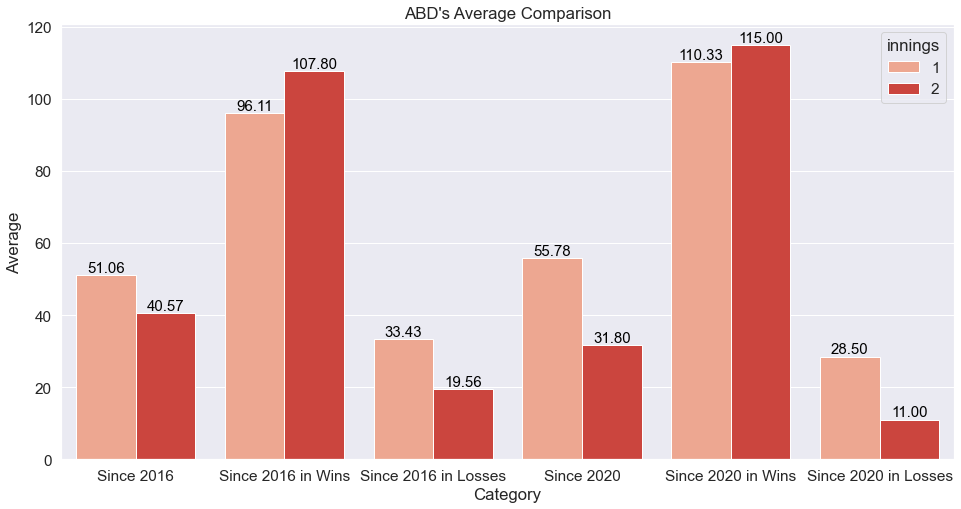

In [119]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x='Category', y='Average', hue=abd_stats.index, palette='Reds', data=abd_stats)
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Average', shadow=True)
plt.title("ABD's Average Comparison")
plt.xticks(rotation=0);

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)
        
#'dark:salmon_r', 'crest', 'icefire', 

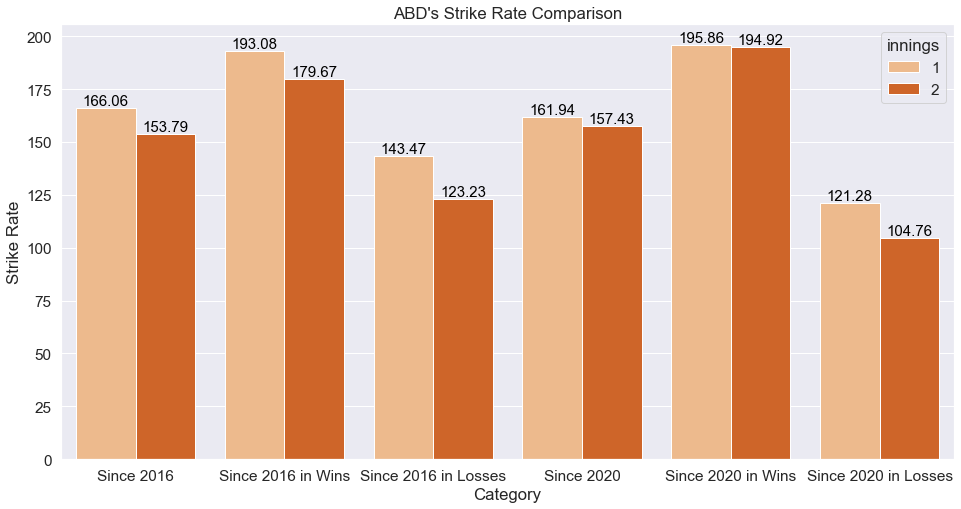

In [121]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x='Category', y='Strike Rate', hue=abd_stats.index, palette='Oranges', data=abd_stats)
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Average', shadow=True)
plt.title("ABD's Strike Rate Comparison")
plt.xticks(rotation=0);

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)
        
#'dark:salmon_r', 'crest', 'icefire', 

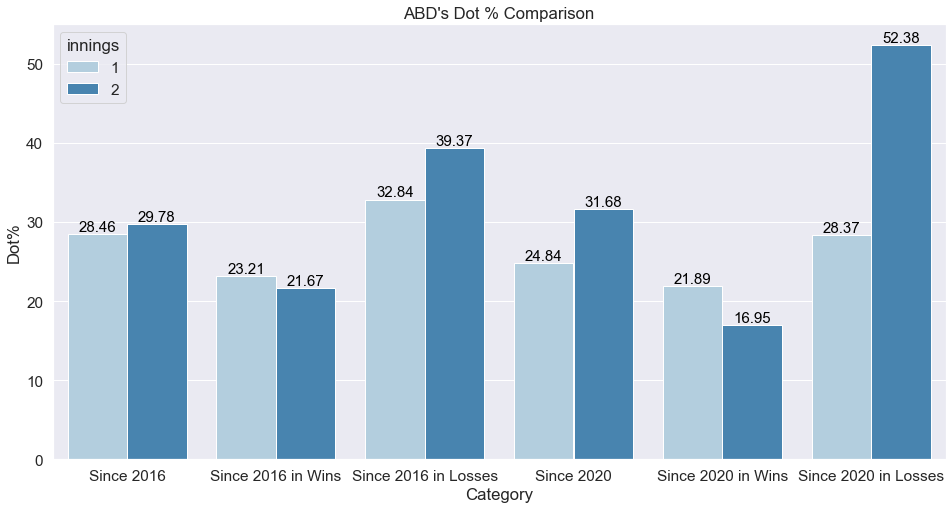

In [117]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x='Category', y='Dot%', hue=abd_stats.index, palette='Blues', data=abd_stats)
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Average', shadow=True)
plt.title("ABD's Dot % Comparison")
plt.xticks(rotation=0);

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)
        
#'dark:salmon_r', 'crest', 'icefire', 

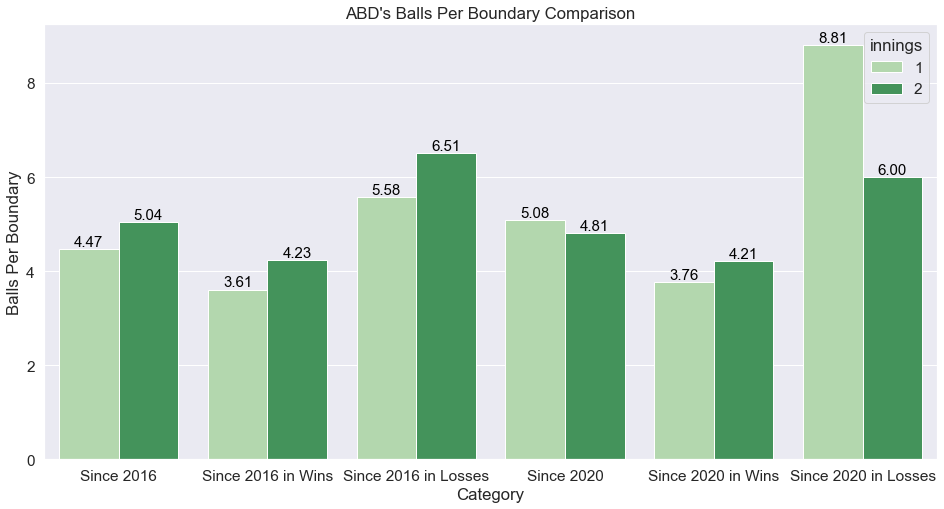

In [123]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.4)
# sns.set_style('darkgrid')
graph = sns.barplot(x='Category', y='Balls Per Boundary', hue=abd_stats.index, palette='Greens', data=abd_stats)
# plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., title='Average', shadow=True)
plt.title("ABD's Balls Per Boundary Comparison")
plt.xticks(rotation=0);

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)
        
#'dark:salmon_r', 'crest', 'icefire', 